# NVIDIA time series analisis with python


📌 Introduction 

In this project, we explore and contextualize the financial market, with emphasis on  **NVIDIA** and **Bitcoin** data market. aiming to determine wich asset was more profitable from 2020 to 2025
#
As an optional and complementary extension, we also develop a **Transformer-bases machine learning model**, to evaluate its capacity to predict movements for **NVIDIA**.
#
*This model is not the main idea of the job, but it shows the potential of machine learning in time series analisis.* 




In [1]:
#imports 

import pandas as pd
import numpy as np
from datetime import datetime, timedelta 


import yfinance as yf

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px


In [2]:

import plotly.io as pio

pio.renderers.default = "png"

📥 loading the data

we started by downloading the historical data of  **NVIDIA** (NVDA) using the yfinance library. Then, we explored its structure, checked for missing values and performed  basic preparation for interactive visualizations with Plolty

In [3]:
#interval 

start = "2020-01-01"
end = "2025-05-31"

#ticker
ticker = "NVDA"

#get data 

nvda = yf.download(ticker, start, end)

#preview the data 
nvda

/tmp/ipykernel_451049/3237408474.py:11: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-01-02,5.971746,5.971746,5.892342,5.942872,237536000
2020-01-03,5.876163,5.919972,5.827126,5.852018,205384000
2020-01-06,5.900806,5.906034,5.756684,5.782820,262636000
2020-01-07,5.972245,6.018045,5.884128,5.929182,314856000
2020-01-08,5.983446,6.024766,5.927937,5.968013,277108000
...,...,...,...,...,...
2025-05-23,131.280884,132.670787,129.151042,129.990980,198821300
2025-05-27,135.490585,135.650578,133.300735,134.140673,192953600


In [4]:
#describe the data
nvda.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,1360.000000,1360.000000,1360.000000,1360.000000,1.360000e+03
mean,44.741815,45.590498,43.810030,44.744791,4.342142e+08
std,43.069255,43.903162,42.182949,43.130547,1.883864e+08
min,4.891637,5.228870,4.500106,4.983791,9.788400e+07
25%,13.895235,14.146936,13.678739,13.939442,2.924312e+08
50%,22.679834,23.014240,22.183557,22.612917,4.090920e+08
75%,59.682188,59.988555,58.680136,59.663199,5.367932e+08
max,149.405869,153.105279,147.796143,153.005289,1.543911e+09


In [5]:
#nulls 

nvda.isnull().sum()

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64


*It appears that the DataFrame contains a MultiIndex structure. To facilite data handling, we will flatten the columns*


In [6]:
nvda.columns = nvda.columns.droplevel(1)

📈 Visualizing the data 

We visualized the Market's evolution from 2020 to mid 2025.

We focused on the critic period of april 2025, observing how the market react to the tariff crisis.

To better understand the behavior during this time, we included a candlestick chart for more detailed insights


In [7]:
#set colors 

dc_colors = ["#2B3A64", "#96aae3", "#C3681D", "#EFBD95", "#E73F74", "#80BA5A", "#E68310", "#008695", "#CF1C90", "#f97b72", "#4b4b8f", "#A5AA99"]

# Set template
pio.templates["dc"] = go.layout.Template(
    layout=dict(
    	font={"family": "Poppins, Sans-serif", "color": "#505050"},
        title={"font": {"family": "Poppins, Sans-serif", "color": "black"}, "yanchor": "top", "y": 0.92, "xanchor": "left", "x": 0.025},
    	plot_bgcolor="white",
    	paper_bgcolor="white",
    	hoverlabel=dict(bgcolor="white"),
    	margin=dict(l=100, r=50, t=75, b=70),
        colorway=dc_colors,
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=True, 
                   gridwidth=0.1, 
                   gridcolor='lightgrey', 
                   showline=True,
                   nticks=10,
                   linewidth=1, 
                   linecolor='black', 
                   rangemode="tozero")
    )
) 

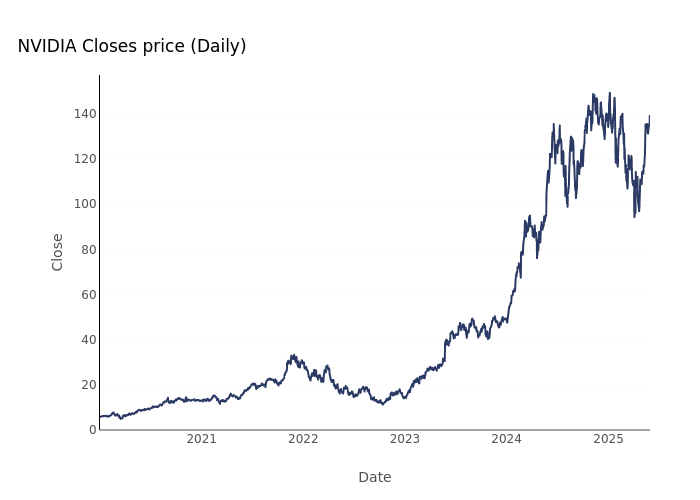

In [8]:
fig = px.line(nvda,
              x = nvda.index,
              y = "Close",
              template= "dc",
              title= "NVIDIA Closes price (Daily)")

fig.show()

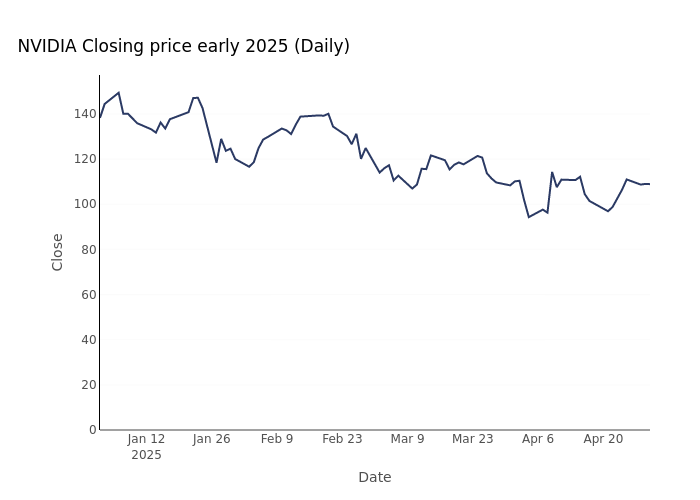

In [9]:
# Filtered dataframe for march 2020

nvda_2025 = nvda["2025-01":"2025-04"]

fig = px.line(nvda_2025,
              x= nvda_2025.index,
              y = "Close",
              template= "dc",
              title= "NVIDIA Closing price early 2025 (Daily)")

fig.show()



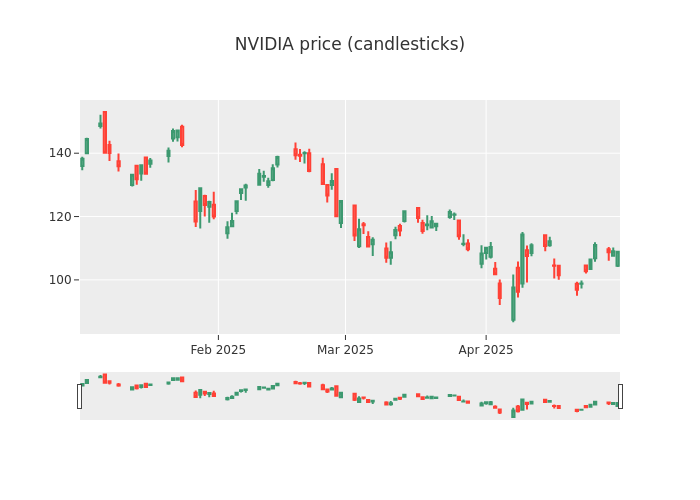

In [10]:
candlestick = go.Candlestick(
    x = nvda_2025.index,
    open = nvda_2025['Open'],
    close = nvda_2025['Close'],
    high = nvda_2025['High'],
    low = nvda_2025['Low']
)

#create the figure

fig = go.Figure(data = candlestick)
fig.update_layout(title = "NVIDIA price (candlesticks)", template ="ggplot2")
fig.show()

🪙 Bitcoin comparison
#
We download historical data for Bitcoin (BTC-USD) to compare with the NVIDIA Stocks
#
To make both assets comparable, we applied a base-100 normalization, allowing us to visualize their relative growth from a common starting point

#
Finally, we created a logarithmic-scale chart to better capture the cumulative percentage changes over the time, especially during period of rapid growth

In [11]:
btc = yf.download(tickers='BTC-USD', start= start, end= end)
btc.columns = btc.columns.droplevel(1)


/tmp/ipykernel_451049/1109610688.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [12]:
Combined = pd.DataFrame({
    "NVIDIA": nvda["Close"],
    "Bitcoin":btc["Close"]
})

Combined.dropna(inplace= True) #we must drop NaN because Bitcoin trades on weekends while nvidia doesn't
normalized = Combined / Combined.iloc[0] * 100
normalized


,NVIDIA,Bitcoin
Date,,
2020-01-02,100.000000,100.000000
2020-01-03,98.399413,105.145166
2020-01-06,98.812080,111.219703
2020-01-07,100.008352,116.866755
2020-01-08,100.195917,115.666699
...,...,...
2025-05-23,2198.366851,1535.870794
2025-05-27,2268.860498,1560.304994
2025-05-28,2257.307070,1543.236530


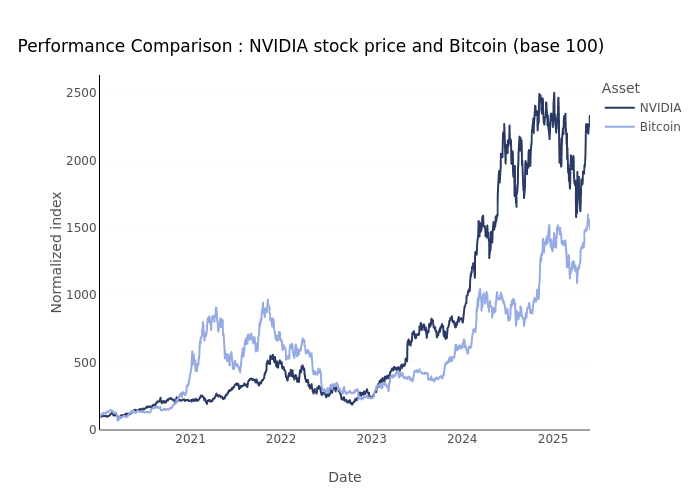

In [13]:
fig = px.line(normalized,
              x = normalized.index,
              y=['NVIDIA', 'Bitcoin'],
              title="Performance Comparison : NVIDIA stock price and Bitcoin (base 100)",
              labels={"value": "Normalized index", "variable":"Asset"},
              template="dc"
              )

fig.show()

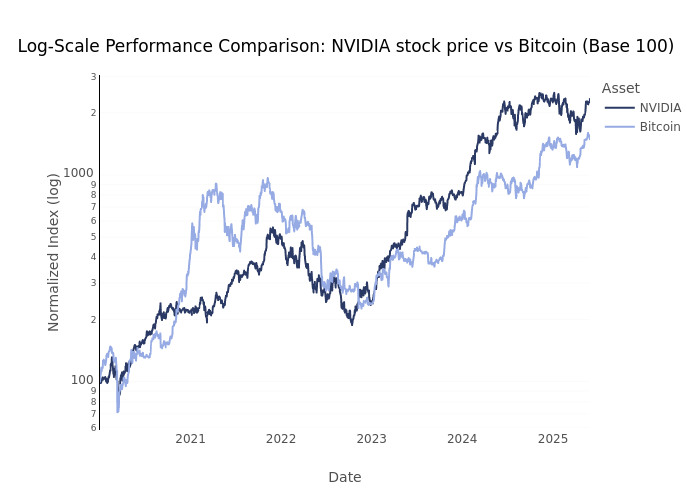

In [14]:
fig_log = px.line(normalized,
                  x=normalized.index,
                  y=["NVIDIA", "Bitcoin"],
                  title="Log-Scale Performance Comparison: NVIDIA stock price vs Bitcoin (Base 100)",
                  labels={"value": "Normalized Index (log)", "variable": "Asset"},
                  template="dc")

fig_log.update_yaxes(type="log")
fig_log.show()

### Bonus


🧠 Model dataset


In order to enrich our understanding of the market, we expanded the dataset with key economic and technical variables:


- **VIX**: A measure of the expect market volatility (commonly "fear index") 
- **10Y Yield**: The yield on the 10-year U.S. Treasury bond, a key benchmark for interest rates and economic outlook.
- **Volume**: Trading volume for NVIDIA.
- **Technical indicators**:
    - *ATR* (Avarage True Range): A volatility indicator that measures market fluctuations.

    - *MFI* (Money Flow Index): A momentun indicator that uses price and volume data to identify buying and selling pressure


these factors provide both technical and macroeconomics context to support the predictive model

In [15]:


import ta
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import Huber
from sklearn.metrics import r2_score, median_absolute_error
import random, os

2025-06-30 16:18:15.095922: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-30 16:18:15.146952: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-30 16:18:15.181021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751318295.211987  451049 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751318295.224663  451049 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751318295.303378  451049 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [16]:

SEED = 87
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()


start_date = "2010-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

#tickers

tickers = {
    "NVDA":"NVDA",      
    "VIX": "^VIX",
    "10Y_Yield": "^TNX"
}
                

In [17]:

data = {}
for name, ticker in tickers.items():
    df = yf.download(ticker, start = start_date, end = end_date)
    df.columns = df.columns.droplevel(1)
    data[name]=df["Close"].rename(name)

# Combine dataframe

df_merged = pd.concat(data.values(), axis = 1)
df_merged.dropna(inplace= True)
final_df = df_merged.copy()

/tmp/ipykernel_451049/114096011.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_451049/114096011.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_451049/114096011.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [18]:
#Volume

data_stock = yf.download('NVDA', start= start_date, end= end_date)
data_stock.columns = data_stock.columns.droplevel(1)
final_df['Volume_NVDA'] = data_stock['Volume']

/tmp/ipykernel_451049/1758795905.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [19]:
datos = final_df.copy()
datos['atr'] = ta.volatility.AverageTrueRange(high = data_stock['High'], low = data_stock['Low'], close = data_stock['Close'], window = 14).average_true_range()
datos['mfi'] = ta.volume.MFIIndicator(high = data_stock['High'], low = data_stock['Low'],
                                           close = data_stock['Close'], volume = data_stock['Volume'],
                                            window = 14).money_flow_index()
datos['NVDA'] = ta.trend.EMAIndicator(datos['NVDA'], window=5).ema_indicator()
datos.dropna(inplace= True)

⚙️ Preprocessing and scaling

We use *RobustScaler* to scaling the techinical and economic variables. This method is particularly effective at handling outliers, ensuring that extreme values do not distort the model's learning process 


In [20]:
cols_to_scale = [
    "NVDA",
    "Volume_NVDA",
    "VIX",
    "10Y_Yield",
    "atr", 
    "mfi"
]

scaled_df = datos.copy()

scaler = RobustScaler(quantile_range=(25,75))
scaled_df[cols_to_scale] = scaler.fit_transform(scaled_df[cols_to_scale])

In [21]:
scaled_df

,NVDA,VIX,10Y_Yield,Volume_NVDA,atr,mfi
Date,,,,,,
2010-01-22,-0.228714,1.396909,0.927435,2.179875,-0.178806,-1.419944
2010-01-25,-0.228879,1.146991,0.952270,0.755171,-0.178899,-1.184956
2010-01-26,-0.229261,1.033870,0.952270,0.993472,-0.179064,-1.561088
2010-01-27,-0.229289,0.848405,0.963135,1.322137,-0.178900,-1.534384
2010-01-28,-0.229597,0.926011,0.974001,0.903230,-0.177980,-1.540382
...,...,...,...,...,...,...
2025-06-23,9.449476,0.413022,1.487776,-0.888245,5.981455,0.042902
2025-06-24,9.533891,0.103913,1.466822,-0.776559,5.977328,0.019578
2025-06-25,9.734024,0.009207,1.466822,-0.502592,6.292148,0.116104


⛓️ Preparing the sequential dataset 

We split the dataset into training, validation and test sets, preserving the chronological order. Then, we constructed temporal sequences in order to enable ***multistep forecasting***, where the sequence predicts the next *n* days

This approach is ideal for  models like LSTM and Transformer, which operate using rolling windows over time-series data. 

In [22]:
def split_data(df, train_size=0.7, val_size=0.2):
    total_size = len(df)
    
    train_end = int(total_size * train_size)
    val_end = int(total_size * (train_size + val_size))

    train = df.iloc[:train_end]
    val = df.iloc[train_end:val_end]
    test = df.iloc[val_end:]

    return train, val, test


train_df, val_df, test_df = split_data(scaled_df)
seq_length = 30

In [23]:
def create_multistep_sequences(data, seq_length, n_steps_out):
    X, y = [], []
    for i in range(len(data) - seq_length - n_steps_out):
        X.append(data.iloc[i:i+seq_length].values)  # entry sequence
        y.append(data.iloc[i+seq_length:i+seq_length+n_steps_out, 0])  # 'Close_smooth' from t+1 to t+n
    return np.array(X), np.array(y)

In [24]:
n_steps_out = 5
X_train, y_train = create_multistep_sequences(train_df, seq_length, n_steps_out)
X_val, y_val = create_multistep_sequences(val_df, seq_length, n_steps_out)
X_test, y_test = create_multistep_sequences(test_df, seq_length, n_steps_out)

In [25]:
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, d_model):
        super().__init__()
        self.pos_embedding = self.add_weight(
            name="pos_embedding",
            shape=(sequence_length, d_model),
            initializer="random_normal",
            trainable=True,
        )


    def call(self, x):
        return x + self.pos_embedding


🧬 Building the Transformer Model.

We built a Transformer model optimized for time series analysis, which includes:

- **Initial proyection** of the input data into a  latent dimension.
- **Positional embeding**, essential for capturing the temporal nature of the data data.
- multiple layers of **Multi-head Attention**, allowing the model to focus on differents parts of the sequence.
- **Feed-forward** with *GELU* activation 
- **Dropout** and **layer normalization** to regularize and stabilize the training.

we compile the model using *Huber loss*, which is robust to ouliers, and we added *early stopping* and **Learning Rate Reduction** callbacks to improve training efficiency

In [26]:
def build_optimized_transformer(input_shape, output_dim, num_heads=4, ff_dim=128, num_layers=2, dropout_rate=0.2):
    seq_len, n_features = input_shape

    inputs = layers.Input(shape=(seq_len, n_features))

    # Initial projection to model dimension
    x = layers.Dense(ff_dim)(inputs)

    
    x = PositionalEmbedding(sequence_length=seq_len, d_model=ff_dim)(x)

    for _ in range(num_layers):
        # Multi-Head Attention
        attn_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=ff_dim,
            dropout=dropout_rate
        )(x, x)

        # Residual + LayerNorm
        x = layers.LayerNormalization(epsilon=1e-6)(x + attn_output)

        # Feed Forward
        ffn = tf.keras.Sequential([
            layers.Dense(ff_dim * 2, activation='gelu'),
            layers.Dropout(dropout_rate),
            layers.Dense(ff_dim)
        ])
        x = layers.LayerNormalization(epsilon=1e-6)(x + ffn(x))

    # Pooling y output
    x = layers.GlobalAveragePooling1D()(x)
    output = layers.Dense(output_dim)(x)

    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=Huber(),
        metrics=['mae']
    )

    return model

In [27]:
input_shape = X_train.shape[1:]  # (seq_len, n_features)
output_dim = y_train.shape[1]    # n_steps_out

transformer_model_opt = build_optimized_transformer(input_shape, output_dim)

early_stop = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6)


E0000 00:00:1751318301.523444  451049 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1751318301.526225  451049 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


📉 Training and Evaluation

We trained the model using our sequential dataset and evaluated its performance on the validation set.
We presented a visual comparison of the predictions against the actual values using two approaches:

- **One-step ahead prediction** (t+1).

- **Multistep prediction** (up to 5 days ahead).

This allows us to assess both the model’s immediate accuracy and its ability to maintain consistency over time.

In [28]:
history = transformer_model_opt.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop, lr_reducer],
    verbose=1
)

Epoch 1/100


2025-06-30 16:18:21.711193: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.1791 - mae: 0.4298

2025-06-30 16:18:31.762458: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - loss: 0.1766 - mae: 0.4254 - val_loss: 0.1139 - val_mae: 0.3907 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 168ms/step - loss: 0.0034 - mae: 0.0651 - val_loss: 0.1298 - val_mae: 0.4247 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - loss: 0.0021 - mae: 0.0513 - val_loss: 0.1204 - val_mae: 0.4117 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 0.0018 - mae: 0.0483 - val_loss: 0.1137 - val_mae: 0.3911 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - loss: 0.0016 - mae: 0.0446 - val_loss: 0.1153 - val_mae: 0.3956 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0014 - mae: 0.0418 - val_loss: 0.1028 - val_mae: 0.3719 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 174ms/step - loss: 0.0013 - mae: 0.0401 - val_loss: 0.0887 - val_mae: 0.3427 - learning_rate: 0.0010
Epoch 8/10

In [29]:
y_pred = transformer_model_opt.predict(X_val)


 1/24 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step

2025-06-30 16:23:01.577591: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


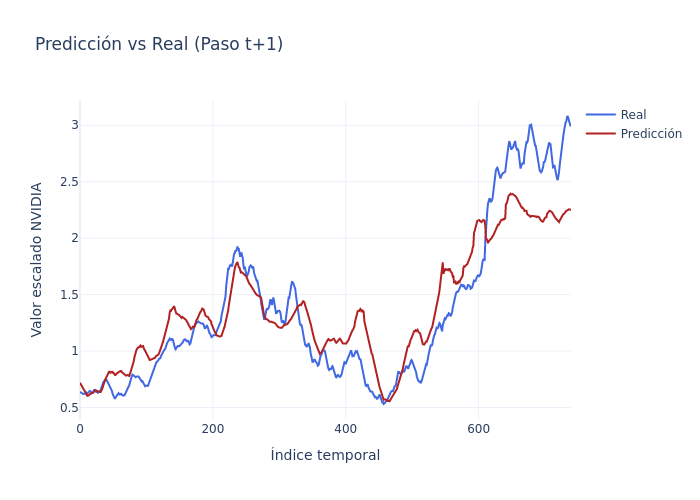

In [30]:
# one step

fig = go.Figure()

fig.add_trace(go.Scatter(
    y = y_val[:,0], 
    mode='lines',
    name='Real',
    line = dict(color ='royalblue')
))

fig.add_trace(go.Scatter(
    y=y_pred[:,0],
    mode='lines',
    name='Predicción',
    line=dict(color='firebrick')
))

fig.update_layout(
    title="Predicción vs Real (Paso t+1)",
    xaxis_title="Índice temporal",
    yaxis_title="Valor escalado NVIDIA",
    template="plotly_white"
)

fig.show()


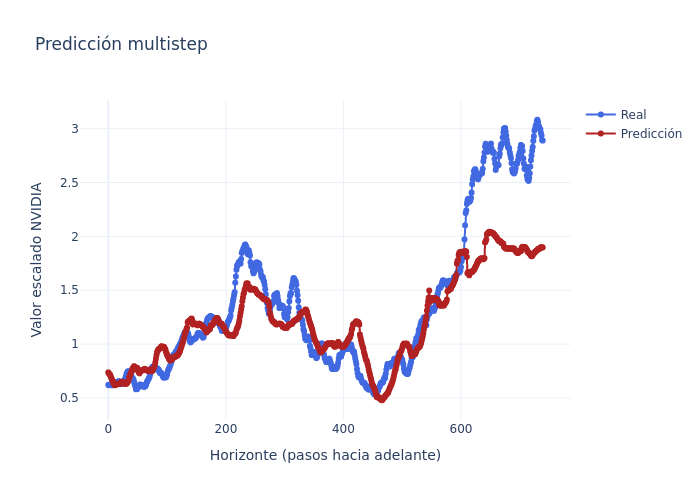

In [31]:
# multi step

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=y_val[:, -1], 
    mode='lines+markers', 
    name='Real',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatter(
    y=y_pred[:, -1],
    mode='lines+markers',
    name='Predicción',
    line=dict(color='firebrick')
))

fig.update_layout(
    title="Predicción multistep",
    xaxis_title="Horizonte (pasos hacia adelante)",
    yaxis_title="Valor escalado NVIDIA",
    template="plotly_white"
)

fig.show()


📊 Model Metrics

We evaluated the model’s performance using the following metrics:

- **R² Score**: Measures how well the predictions explain the variance in the actual data.

- **MedAE (Median Absolute Error)**: A robust measure of prediction error, less sensitive to outliers.

- **Percentage of errors < 1%**: Indicates how many predictions fall within a very small error margin.

These metrics are essential to validate the model's practical utility in financial scenarios.

In [32]:
min_len = min(len(y_val), len(y_pred))
y_val = y_val[:min_len]
y_pred_val = y_pred[:min_len]

In [33]:
errors_b = y_val.flatten() - y_pred_val.flatten()

r2= r2_score(y_val, y_pred_val)
medae = median_absolute_error(y_val, y_pred_val)



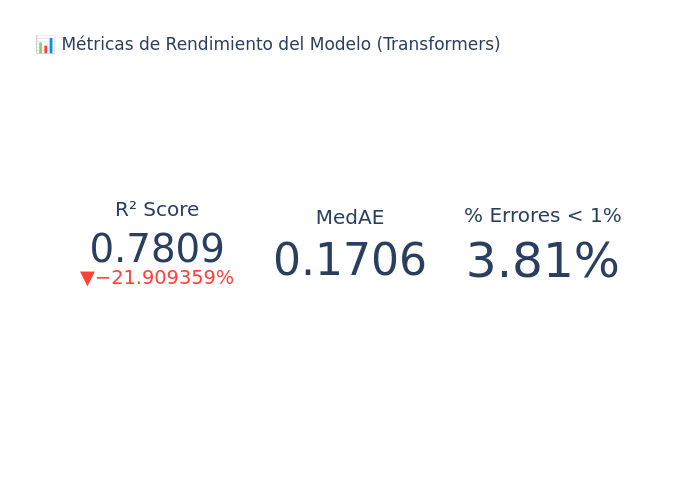

In [34]:

fig = go.Figure()

# R²
fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = r2,
    delta = {"reference": 1, "relative": True},
    title = {"text": "R² Score"},
    number = {'valueformat': '.4f'},
    domain = {'row': 0, 'column': 0}
))

# MedAE
fig.add_trace(go.Indicator(
    mode = "number",
    value = medae,
    title = {"text": "MedAE"},
    number = {'valueformat': '.4f'},
    domain = {'row': 0, 'column': 1}
))

# % errores < 1%
porcentaje_errores = np.mean(np.abs(errors_b) < 0.01) * 100
fig.add_trace(go.Indicator(
    mode = "number",
    value = porcentaje_errores,
    title = {"text": "% Errores < 1%"},
    number = {'suffix': '%', 'valueformat': '.2f'},
    domain = {'row': 0, 'column': 2}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 3, 'pattern': "independent"},
    title_text = "📊 Métricas de Rendimiento del Modelo (Transformers)",
    template="plotly_white"
)

fig.show()

🧾 Conclusion

In this analysis, we explored the behavior and performance of **NVIDIA stock** and **Bitcoin** from 2020 to mid-2025. Through normalization and comparative visualizations, we identified key differences in growth, volatility, and market reaction to critical events such as the tariff war.

As an additional component, we built a **Transformer-based model** to predict short-term movements of NVIDIA stock. Although this model was not the main goal of the project, it demonstrated the potential of deep learning techniques in time series forecasting when complemented by macroeconomic and technical indicators.

The predictive results were promising, particularly in one-step forecasts, while longer-term predictions revealed the inherent challenge of modeling financial markets. Future improvements could include hyperparameter tuning, feature engineering with sentiment analysis, or the incorporation of macroeconomic calendar events.

This project not only highlights the power of data-driven analysis in finance, but also lays the foundation for more complex and robust forecasting systems.